In [1]:
# 在Jupyter Notebook中安装库
%pip install matplotlib seaborn pandas

Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLEOFError(8, '[SSL: UNEXPECTED_EOF_WHILE_READING] EOF occurred in violation of protocol (_ssl.c:1017)'))) - skipping
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set_theme(style="whitegrid")
# 加载泰坦尼克号数据集
titanic = sns.load_dataset("titanic", data_home="./data/seaborn-data", cache=True)


print(titanic.head(5))
print(titanic.info())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-nu

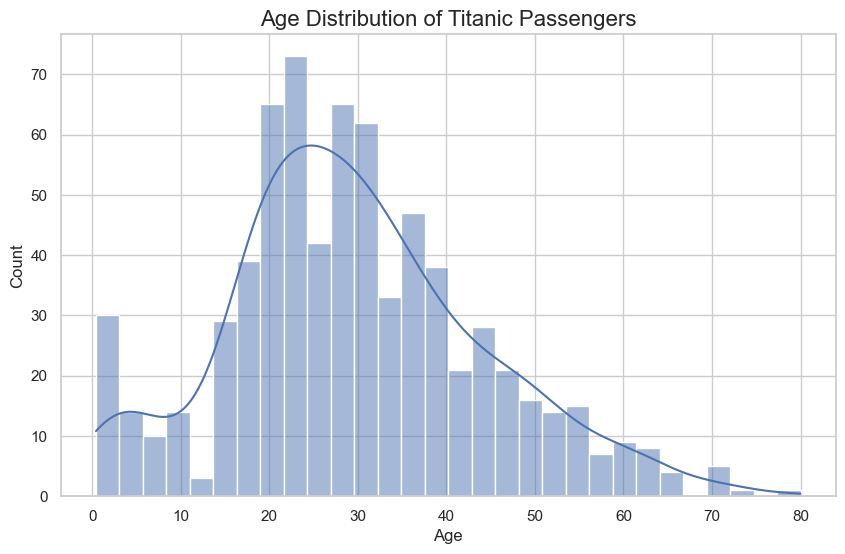

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic, x="age", bins=30, kde=True)
plt.title("Age Distribution of Titanic Passengers", fontsize=16)
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

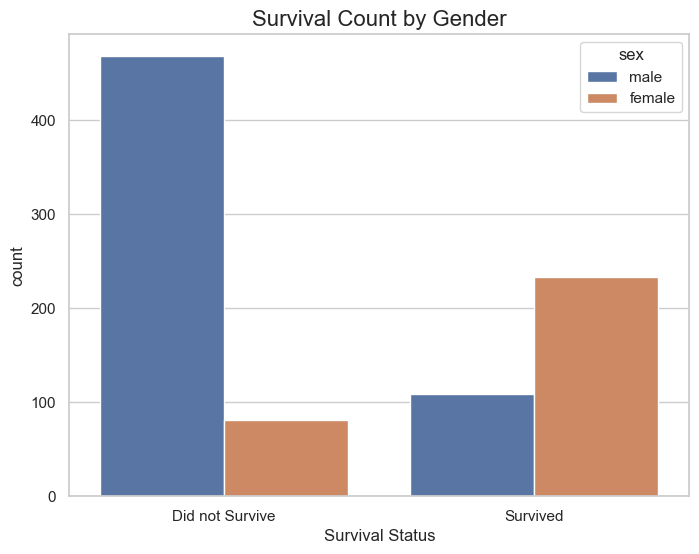

In [31]:
# 使用countplot来统计分类变量
plt.figure(figsize=(8, 6))
# hue参数可以根据另一个分类变量将数据分组
sns.countplot(data=titanic, x="survived", hue="sex")
plt.title("Survival Count by Gender", fontsize=16)
# 修改坐标轴的标签，使其更易读
plt.xticks(ticks=[0, 1], labels=["Did not Survive", "Survived"])
plt.xlabel("Survival Status")
plt.show()

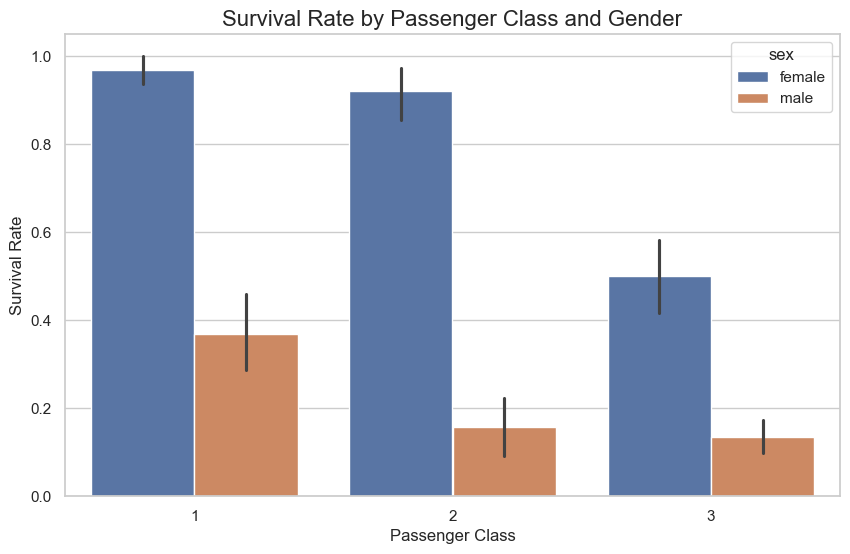

In [ ]:
# barplot可以展示一个数值变量在不同类别下的均值 (默认)
plt.figure(figsize=(10, 6))
# x是类别, y是数值。这里y='survived'，其均值就是生还率 (因为Survived是0或1)
sns.barplot(data=titanic, x="pclass", y="survived", hue="sex")
plt.title("Survival Rate by Passenger Class and Gender", fontsize=16)
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()

In [ ]:
import json

import requests

# --- 1. 定义API的URL和参数 ---
# URL是API的地址
url = "https://api.open-meteo.com/v1/forecast"
# params是我们要传递给API的查询条件
params = {
    "latitude": 39.91,  # 北京的维度
    "longitude": 116.4,  # 北京的经度
    "current_weather": True,  # 我们想要获取当前天气
}

# --- 2. 发送GET请求 ---
# requests.get()会向指定的URL发送一个GET请求
# 我们把参数作为params参数传递，requests会自动帮我们拼接到URL后面
response = requests.get(url, params=params)

# --- 3. 检查响应 ---
# 一个好的习惯是先检查请求是否成功
# HTTP状态码200表示成功
if response.status_code == 200:
    print("requests successed!")

    # --- 4. 解析JSON数据 ---
    # API返回的数据通常是JSON格式，它看起来像Python的字典和列表的组合
    # response.json() 会自动将返回的JSON文本转换成Python字典
    data = response.json()

    print("\n--- 完整的API响应 ---")
    print(json.dumps(data, indent=4, ensure_ascii=False))

    # --- 5. 提取我们关心的信息 ---
    # 像操作字典一样，从解析后的数据中提取需要的值
    current_weather = data["current_weather"]
    temperature = current_weather["temperature"]
    windspeed = current_weather["windspeed"]
    weathercode = current_weather["weathercode"]

    print("\n--- 提取的关键信息 ---")
    print("城市: 北京")
    print(f"当前温度: {temperature}°C")
    print(f"当前风速: {windspeed} km/h")

    def interpret_weathercode(code):
        if code == 0:
            return "晴天"
        if code in [1, 2, 3]:
            return "大致晴朗，局部多云"
        if code in [45, 48]:
            return "有雾"
        # ...可以根据API文档添加更多
        return "未知天气代码"

    print(f"天气状况: {interpret_weathercode(weathercode)}")

else:
    print(f"请求失败，状态码: {response.status_code}")
    print(f"错误信息: {response.text}")


requests successed!

--- 完整的API响应 ---
{
    "latitude": 39.875,
    "longitude": 116.375,
    "generationtime_ms": 0.05424022674560547,
    "utc_offset_seconds": 0,
    "timezone": "GMT",
    "timezone_abbreviation": "GMT",
    "elevation": 47.0,
    "current_weather_units": {
        "time": "iso8601",
        "interval": "seconds",
        "temperature": "°C",
        "windspeed": "km/h",
        "winddirection": "°",
        "is_day": "",
        "weathercode": "wmo code"
    },
    "current_weather": {
        "time": "2025-07-16T08:30",
        "interval": 900,
        "temperature": 32.8,
        "windspeed": 4.8,
        "winddirection": 117,
        "is_day": 1,
        "weathercode": 2
    }
}

--- 提取的关键信息 ---
城市: 北京
当前温度: 32.8°C
当前风速: 4.8 km/h
天气状况: 大致晴朗，局部多云
